In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

In [2]:
os.chdir("G:\\Python\\Regression\\Linear_Regression_using_Python")
inc_exp = pd.read_csv("Inc_Exp_Data.csv")
inc_exp.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [3]:
pd.set_option('expand_frame_repr', False)
inc_exp

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


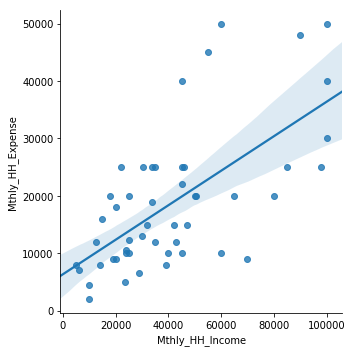

In [4]:
import seaborn as sns
sns.lmplot(x ="Mthly_HH_Income" ,
           y = "Mthly_HH_Expense", 
           data = inc_exp)

In [5]:
#Another way to fit regression line
#fit = np.polyfit(inc_exp["Mthly_HH_Income"],inc_exp["Mthly_HH_Expense"],1)
#fit_fn = np.poly1d(fit)
#plt.plot(inc_exp["Mthly_HH_Income"],inc_exp["Mthly_HH_Expense"],
 #        'yo',inc_exp["Mthly_HH_Income"] , fit_fn(inc_exp["Mthly_HH_Income"]), '--k')

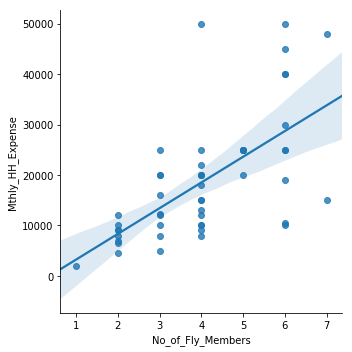

In [6]:
sns.lmplot(x ="No_of_Fly_Members" ,
           y = "Mthly_HH_Expense", 
           data = inc_exp)

In [7]:
import statsmodels.formula.api as sm
from statsmodels.api import graphics

In [8]:
#Linear Regression Model
linear_mod = sm.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income" , 
                    data = inc_exp).fit()


In [9]:
#Get the coefficient and intercept
print(linear_mod.params)
print(linear_mod.rsquared)

#Intercept is the value where Mthly_HH_Income is zero. means 6319 is required to survive

Intercept          6319.101760
Mthly_HH_Income       0.300758
dtype: float64
0.42148044723596234


In [10]:
linear_mod.summary()
# R^2	42.1 percentage of variance in Expence is explained by income

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     34.97
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           3.40e-07
Time:                        15:42:11   Log-Likelihood:                -526.77
No. Observations:                  50   AIC:                             1058.
Df Residuals:                      48   BIC:                             1061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6319.1018   2488.733      2.539      0.014    1315.168    1.13e+04
Mthly_HH_Income     0.3008      0.051      5.914      0.000       0.198       0.403
==============================================================================
Omnibus:                        6.455   Durbin-Watson:                   2.417
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.471
Skew:                           0.774   Prob(JB):                       0.0649
Kurtosis:                       3.479   Cond. No.                     9.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#Multiple Regression
inc_exp.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


In [12]:
m_linear_mod = sm.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members" ,data = inc_exp).fit()
print(m_linear_mod.rsquared)

0.5736119267657428


In [13]:
m_linear_mod = sm.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt" ,data = inc_exp).fit()
print(m_linear_mod.rsquared)

0.6977739444951258


In [14]:
m_linear_mod = sm.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt+\
                      Annual_HH_Income" ,data = inc_exp).fit()
print(m_linear_mod.rsquared)

0.7089401743477451


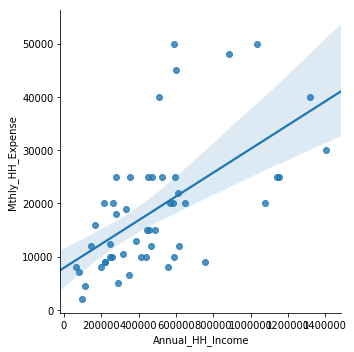

In [15]:
sns.lmplot(x ="Annual_HH_Income" ,
           y = "Mthly_HH_Expense", 
           data = inc_exp)
# Here it says Annual_HH_Income and Mthly_HH_Expense are positive correlated

In [16]:
m_linear_mod.summary()
# but here Annual_HH_Income have a beta which is negative..
# if beta is negative and when we checked individual correlation we found correlations are postive
# we should summarize its due to multicollinearity

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     27.40
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           1.48e-11
Time:                        15:42:12   Log-Likelihood:                -509.59
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      45   BIC:                             1039.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5124.8763   2818.362     -1.818      0.076   -1.08e+04     551.597
Mthly_HH_Income       0.4092      0.157      2.608      0.012       0.093       0.725
No_of_Fly_Members  3224.4195    719.071      4.484      0.000    1776.136    4672.703
Emi_or_Rent_Amt       0.6569      0.158      4.162      0.000       0.339       0.975
Annual_HH_Income     -0.0167      0.013     -1.314      0.196      -0.042       0.009
==============================================================================
Omnibus:                        0.142   Durbin-Watson:                   2.377
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.013
Skew:                           0.035   Prob(JB):                        0.993
Kurtosis:                       2.963   Cond. No.                     1.75e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Here we keep alpha =0.0001
#H0: Y not dependent on x
#H1: Y is dependent on x
#so here we take the variables which have p< 0.0001

# so here Mthly_HH_Income, Annual_HH_Income is not significant but we know they are.. 
# so try just one of those and check p value.

# the reason was Mthly_HH_Income, Annual_HH_Income are highly correlated. hence here the model 
# is forced to give some beta for both and hence making both insignificant

# This is the problem of multicollinearity

In [18]:
m_linear_mod = sm.ols(formula ="Mthly_HH_Expense ~ Annual_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt" ,data = inc_exp).fit()
m_linear_mod.summary()
# coeff - is beta

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     30.43
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           5.42e-11
Time:                        15:42:12   Log-Likelihood:                -513.11
No. Observations:                  50   AIC:                             1034.
Df Residuals:                      46   BIC:                             1042.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4872.9227   2989.043     -1.630      0.110   -1.09e+04    1143.709
Annual_HH_Income      0.0152      0.004      4.258      0.000       0.008       0.022
No_of_Fly_Members  3462.7368    756.880      4.575      0.000    1939.217    4986.257
Emi_or_Rent_Amt       0.7107      0.166      4.280      0.000       0.376       1.045
==============================================================================
Omnibus:                        2.462   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                1.602
Skew:                           0.403   Prob(JB):                        0.449
Kurtosis:                       3.346   Cond. No.                     1.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# In the above you can change annual income by 12monthly income*beta
m_linear_mod = sm.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt" ,data = inc_exp).fit()
m_linear_mod.summary()

# beta of annual*12 is almost same as beta of monthly income

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           5.17e-12
Time:                        15:42:12   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
def VIF(formula,data):
    import pip #To install packages
    #pip.main(["install","dmatrices"])
    #pip.main(["install","statsmodels"])
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) \
       for i in range(X.shape[1])]
    vif["features"] = X.columns
    return(vif.round(1))


In [21]:
VIF=VIF("Mthly_HH_Expense ~ Mthly_HH_Income+\
        No_of_Fly_Members+ Emi_or_Rent_Amt+\
        Annual_HH_Income" ,data = inc_exp)
VIF 
# no meaning for intercept
# Mthly_HH_Income, Annual_HH_Income has value greater than 2
# drop the highest VIF feature at a time  and calculate VIF again. 
#In some times you use business judgement also
# here we will take Mthly_HH_Income because we are trying to explain monthly expense

,VIF Factor,features
0,8.6,Intercept
1,17.7,Mthly_HH_Income
2,1.3,No_of_Fly_Members
3,1.0,Emi_or_Rent_Amt
4,17.4,Annual_HH_Income


In [22]:
#Multiple Linear Regression
m_linear_mod = sm.ols(formula = "Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt",
                      data = inc_exp).fit()

In [23]:
m_linear_mod.params

Intercept           -5148.070385
Mthly_HH_Income         0.210439
No_of_Fly_Members    3232.573874
Emi_or_Rent_Amt         0.685093
dtype: float64

In [24]:
m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           5.17e-12
Time:                        15:42:12   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:

#prediction
predict = m_linear_mod.predict(inc_exp[["Mthly_HH_Income",
                                        "No_of_Fly_Members",
                                        "Emi_or_Rent_Amt"]])

In [26]:
result = pd.DataFrame()
result["Expected"] = inc_exp["Mthly_HH_Expense"] 
result["Observed"] = predict 
result

,Expected,Observed
0,8000,6972.033311
1,7000,4634.991519
2,4500,3421.470393
3,2000,188.896519
4,12000,6002.846988
5,8000,4263.227605
6,16000,31684.488051
7,20000,20283.448672
8,9000,5315.424119
9,9000,11991.011171


In [27]:
inc_exp.columns

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'Highest_Qualified_Member',
       'No_of_Earning_Members'],
      dtype='object')

In [28]:
from statsmodels.graphics.gofplots import qqplot 


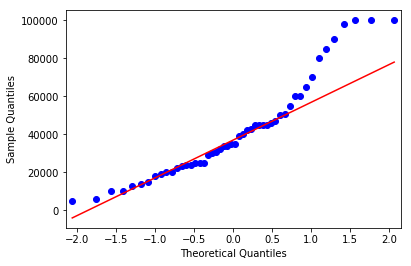

In [29]:
qqplot(inc_exp.Mthly_HH_Income, line='q')
plt.show()

In [30]:
import probscale
import seaborn as sns

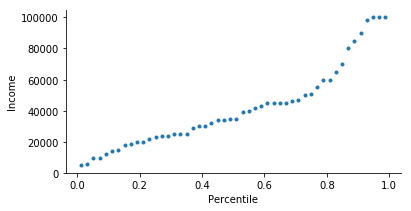

In [31]:
position, bill = probscale.plot_pos(inc_exp.Mthly_HH_Income)
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(position, bill, marker='.', linestyle='none', label='Bill amount')
ax.set_xlabel('Percentile')
ax.set_ylabel('Income')
sns.despine()


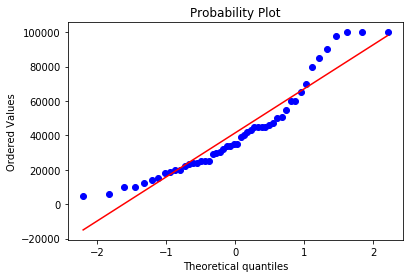

In [32]:
stats.probplot(inc_exp.Mthly_HH_Income,dist='norm',plot=plt)
plt.show()

In [36]:
#Multiple Linear Regression
m_linear_mod = sm.ols(formula = "Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt + No_of_Earning_Members",
                      data = inc_exp).fit()
m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     26.57
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           2.39e-11
Time:                        15:43:54   Log-Likelihood:                -510.14
No. Observations:                  50   AIC:                             1030.
Df Residuals:                      45   BIC:                             1040.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -4732.7369   2890.776     -1.637      0.109   -1.06e+04    1089.585
Mthly_HH_Income           0.2145      0.042      5.058      0.000       0.129       0.300
No_of_Fly_Members      3630.0773    864.543      4.199      0.000    1888.798    5371.356
Emi_or_Rent_Amt           0.6595      0.161      4.099      0.000       0.335       0.984
No_of_Earning_Members -1452.4379   1710.107     -0.849      0.400   -4896.769    1991.894
==============================================================================
Omnibus:                        1.230   Durbin-Watson:                   2.278
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                1.130
Skew:                           0.351   Prob(JB):                        0.568
Kurtosis:                       2.779   Cond. No.                     1.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""